In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Install system dependencies
!apt-get update
!apt-get install -y libcairo2-dev

# Install dependencies from requirements.txt
!pip install -r /content/drive/MyDrive/Quantum_Computing/requirements.txt


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcairo2-dev is already the newest version (1.16.0-5ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


In [4]:
# Install the package directly from GitHub
!pip install git+https://github.com/cailab-tamu/QuantumGRN

import numpy as np
import pandas as pd
from qscgrn import *
import os
import sys

  Cloning https://github.com/cailab-tamu/QuantumGRN to /tmp/pip-req-build-x4bataa6
  Running command git clone --filter=blob:none --quiet https://github.com/cailab-tamu/QuantumGRN /tmp/pip-req-build-x4bataa6
  Resolved https://github.com/cailab-tamu/QuantumGRN to commit 33815cc4bc9254387fd243f143b926fd6a3b30cb
  Preparing metadata (setup.py) ... done
  Created wheel for QuantumGRN: filename=QuantumGRN-1.0.1-py3-none-any.whl size=21071 sha256=bec2731d760f4b7d213862df3456e00b504a202bebba249b5e4d1d182d228e77
  Stored in directory: /tmp/pip-ephem-wheel-cache-n0tg_nc1/wheels/e0/d0/c1/d71b6da40f0d9633b14a2b728e0db61b699fcfc66f51f1ea85
Successfully built QuantumGRN


In [7]:
df_pearson_residual = pd.read_csv("/content/drive/MyDrive/Quantum_Computing/endo_pearsonresidual_9genes.txt", sep='\t')

In [8]:
final = df_pearson_residual

In [9]:
# training qsgrn
from qscgrn import *
final = final.set_index('genes').T
ncells, ngenes = final.shape
final = qsc_order_gene(final)
genes = final.columns.to_list()
p_obs = qsc_distribution(final)
activation = qsc_activation_ratios(final)

2024-05-26 20:02:36 | I | The dataframe genes are ordered
2024-05-26 20:02:36 | I | The observed probability `p_obs` is calculated
2024-05-26 20:02:36 | I | Activation ratios are computed


In [10]:
theta = theta_init(genes, activation_ratios=activation)
edges = edges_init(genes)
qgrn = model(ncells, genes, theta, edges, p_obs)
qgrn.train()

2024-05-26 20:02:36 | I | Theta series is initialized using zeros as method with activation values
2024-05-26 20:02:36 | I | Edges for the QuantumGRN and quantum circuit are created for 9 genes
2024-05-26 20:02:36 | I | The QuantumGRN model is been initialized with 9 genes and 1599 cells
2024-05-26 20:02:37 | I | Starting the optimization for the QuantumGRN
  21/1000 [>.................................................] - ETA: 955:22

KeyboardInterrupt: 

In [11]:
print(genes)

['LIF', 'IGFBP3', 'HOXA10', 'SPP1', 'LOX', 'IL15', 'HGF', 'MMP3', 'MMP1']


In [12]:
draw_network(genes, edges, qgrn.theta, filename="/content/drive/MyDrive/Quantum_Computing/figure5.png")

2024-05-26 20:23:44 | I | Drawing the network representation of the qscGRN model and exporting to /content/drive/MyDrive/Quantum_Computing/figure5.png file.


2024-05-26 20:23:48 | I | Plotting the Observed distribution in a barplot and exporting to /content/drive/MyDrive/Quantum_Computing/figure.svg file.


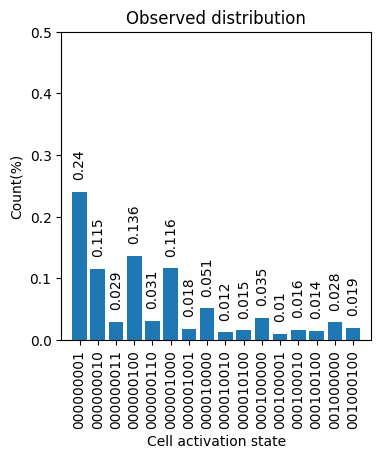

In [13]:
mask = mini_hist(ngenes, p_obs, limit=0.01, ymax=0.5,
                 title="Observed distribution",
                 filename="/content/drive/MyDrive/Quantum_Computing/figure.svg")

In [14]:
p_out = qgrn.p_out.reshape(2**ngenes,)

2024-05-26 20:23:57 | I | Plotting the Comparison of distributions in a barplot and exporting to /content/drive/MyDrive/Quantum_Computing/figure2.svg file.


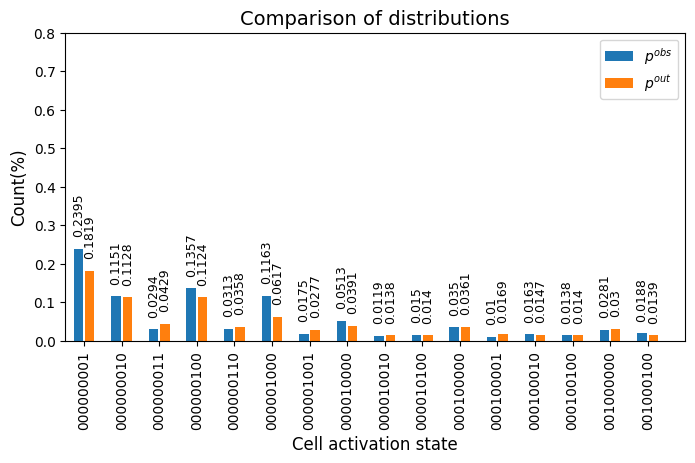

In [15]:
comparison_hist(ngenes, p_obs, p_out, limit=0.01, ymax=0.8, mask=mask,
                filename="/content/drive/MyDrive/Quantum_Computing/figure2.svg")

In [17]:
p_qiskit = qgrn.run_qiskit(filename="/content/drive/MyDrive/Quantum_Computing/figure3.svg")

2024-05-26 20:24:14 | I | Drawing the quantum circuit of the qscGRN model and saving to /content/drive/MyDrive/Quantum_Computing/figure3.svg


2024-05-26 20:24:49 | I | Plotting the Comparison of distributions in a barplot and exporting to /content/drive/MyDrive/Quantum_Computing/figure4.svg file.


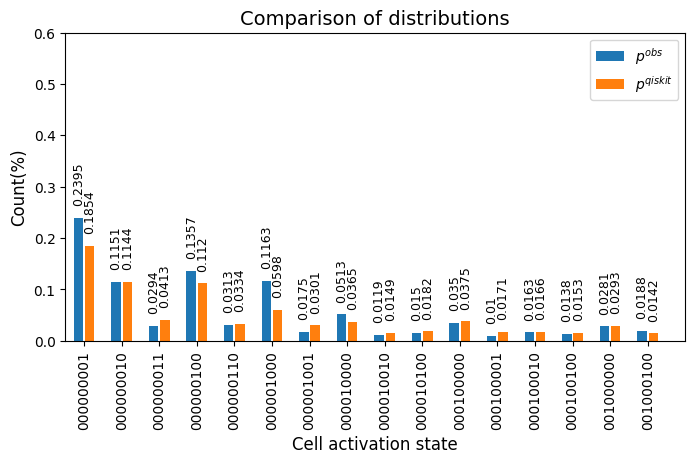

In [19]:
comparison_hist(ngenes, p_obs, p_qiskit, limit=0.01, ymax=0.6, mask=mask,
                filename="/content/drive/MyDrive/Quantum_Computing/figure4.svg", tags=["p^{obs}", "p^{qiskit}"])